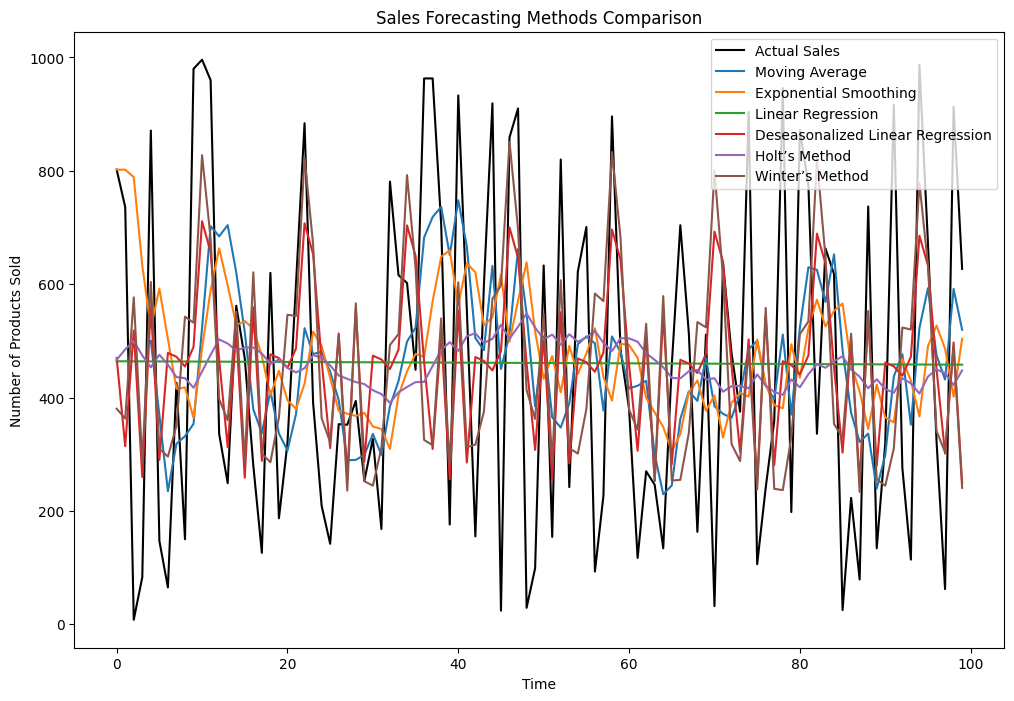

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
data = pd.read_csv('/Users/graydon/Downloads/supply_chain_data.csv')

# Setting the figure for plotting
plt.figure(figsize=(12, 8))

# Plot actual data
plt.plot(data['Number of products sold'], label='Actual Sales', color='black')

# 1. Moving Averages
data['Moving_Average'] = data['Number of products sold'].rolling(
    window=5).mean()
plt.plot(data['Moving_Average'], label='Moving Average')

# 2. Exponential Smoothing
data['Exponential_Smoothing'] = SimpleExpSmoothing(data['Number of products sold']).fit(
    smoothing_level=0.2, optimized=False).fittedvalues
plt.plot(data['Exponential_Smoothing'], label='Exponential Smoothing')

# 3. Linear Regression
X = data.index.values.reshape(-1, 1)  # Using time as the predictor
y = data['Number of products sold']
model_linear = LinearRegression().fit(X, y)
data['Linear_Regression'] = model_linear.predict(X)
plt.plot(data['Linear_Regression'], label='Linear Regression')

# 4. Deseasonalized Linear Regression
# Calculate a seasonal index
seasonal_index = data['Number of products sold'].groupby(
    data.index % 12).mean()
# Repeat the seasonal index to match the length of the dataset
full_seasonal_pattern = np.tile(seasonal_index, len(
    data) // len(seasonal_index) + 1)[:len(data)]
# Deseasonalize the data
deseasonalized = data['Number of products sold'] / full_seasonal_pattern

# Fit linear regression to the deseasonalized data
X = data.index.values.reshape(-1, 1)  # Using time as the predictor
model_deseasonalized = LinearRegression().fit(X, deseasonalized)
# Predict and reseasonalize the output
deseasonalized_prediction = model_deseasonalized.predict(X)
data['Deseasonalized_Linear_Regression'] = deseasonalized_prediction * \
    full_seasonal_pattern

plt.plot(data.index, data['Deseasonalized_Linear_Regression'],
         label='Deseasonalized Linear Regression')


# 5. Holt’s Method
data['Holts_Method'] = ExponentialSmoothing(
    data['Number of products sold'], trend='add').fit().fittedvalues
plt.plot(data['Holts_Method'], label='Holt’s Method')

# 6. Winter’s Method
data['Winters_Method'] = ExponentialSmoothing(
    data['Number of products sold'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
plt.plot(data['Winters_Method'], label='Winter’s Method')

# Add legend and labels
plt.legend()
plt.title('Sales Forecasting Methods Comparison')
plt.xlabel('Time')
plt.ylabel('Number of Products Sold')

# Show the plot
plt.show()

# Save the dataframe with all the forecasts
data.to_csv('forecasted_data.csv', index=False)

#love
